In [1]:
import tensorflow as tf
import keras as keras
import sys

In [2]:
print(tf.__version__)
print(keras.__version__)
print(sys.version)

2.6.0
2.6.0
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [3]:
## 00. 사용할 패키지 불러오기
from keras.datasets import mnist # 데이터 셋 불러오기
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [4]:
### 데이터 셋 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_n = X_train.copy()
y_train_n = y_train.copy()
X_test_n = X_test.copy()
y_test_n = y_test.copy()

In [6]:
# 데이터 셋 크기
# 60000개의 학습용 데이터 셋, 10000개의 테스트 데이터 셋
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
import matplotlib.pyplot as plt

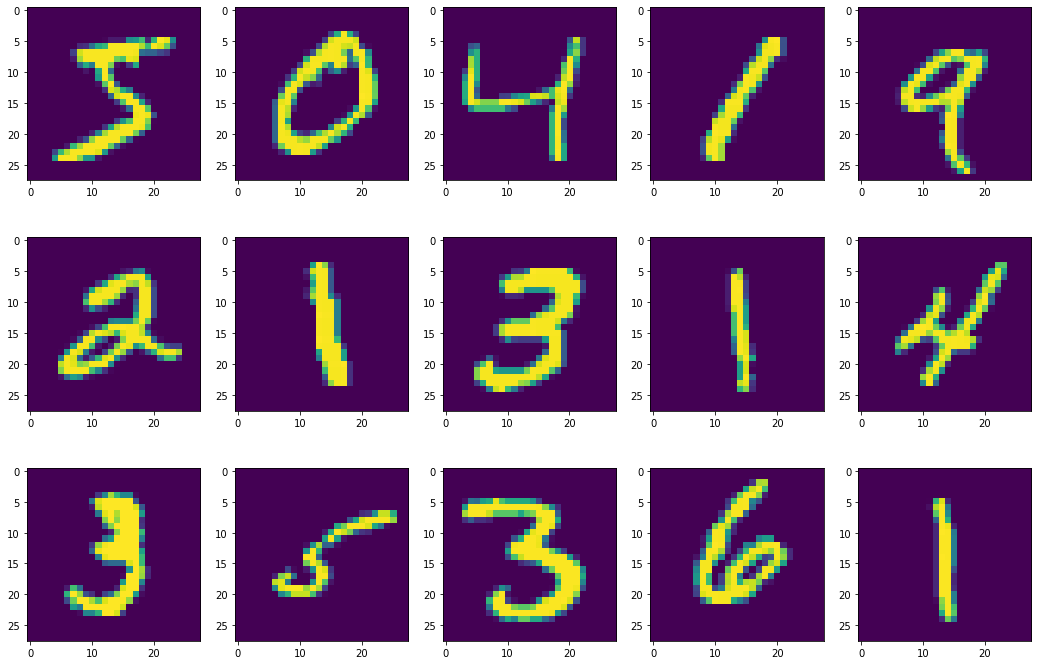

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(18,12) )
for image, ax in zip( X_train, axes.ravel() ):
 ax.imshow(image) # 이미지 표시


In [9]:
## 데이터 셋의 변경 60000, 28, 28 -> 60000, 784 (28*28)
## 데이터 셋의 변경 10000, 28, 28 -> 10000, 784 (28*28)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [10]:
## 데이터 셋의 변경 60000, -> 60000, 10 (28*28)
## 데이터 셋의 변경 10000, -> 10000, 10 (28*28)
print(y_train.shape, y_test.shape)
print(y_train[0:5])
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
## 데이터 자료형 변경
## 01. 실수형 변경.
## 02. 값의 범위를 정규화(0~255) -> 0~1로 변경
print(X_train[0])
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
model = Sequential()
model.add( Dense(units=512, input_dim=28*28, activation='relu')) #입력층(28*28=784노드) - 은닉층(64개
model.add( Dense(512))
model.add( Activation('relu') )
model.add( Dense(512))
model.add( Activation('relu') )
model.add( Dense(512))
model.add( Activation('relu') )
model.add( Dense(512))
model.add( Activation('relu') )
model.add( Dense(512))
model.add( Activation('relu') )
model.add( Dense(512))
model.add( Activation('relu') )
# 한줄로 한다면
# model.add(Dense(32, activation='tanh'))
model.add(Dense(units=10, activation='softmax')) 

In [16]:
model.compile(loss='categorical_crossentropy',
 optimizer='sgd',
 metrics=['accuracy'])

In [17]:
%%time

# hist = model.fit(X_train, y_train, epochs=5, batch_size=32)
hist = model.fit(X_train, y_train,
 validation_data=(X_test, y_test),
 epochs=10,
 batch_size=100,
 verbose=1)

Epoch 1/10
600/600 [==============================] - 23s 37ms/step - loss: 1.5750 - accuracy: 0.5463 - val_loss: 0.5052 - val_accuracy: 0.8431
Epoch 2/10
600/600 [==============================] - 22s 36ms/step - loss: 0.3878 - accuracy: 0.8842 - val_loss: 0.2893 - val_accuracy: 0.9126
Epoch 3/10
600/600 [==============================] - 22s 36ms/step - loss: 0.2725 - accuracy: 0.9195 - val_loss: 0.2211 - val_accuracy: 0.9350
Epoch 4/10
600/600 [==============================] - 22s 36ms/step - loss: 0.2164 - accuracy: 0.9359 - val_loss: 0.2044 - val_accuracy: 0.9384
Epoch 5/10
600/600 [==============================] - 22s 36ms/step - loss: 0.1800 - accuracy: 0.9467 - val_loss: 0.1665 - val_accuracy: 0.9509
Epoch 6/10
600/600 [==============================] - 22s 36ms/step - loss: 0.1537 - accuracy: 0.9551 - val_loss: 0.1496 - val_accuracy: 0.9555
Epoch 7/10
600/600 [==============================] - 21s 36ms/step - loss: 0.1340 - accuracy: 0.9607 - val_loss: 0.1310 - val_accuracy: